<a href="https://colab.research.google.com/github/1HarishK1/Data_Science_project/blob/main/Predictive_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Predictive Modeling for Digital Marketing Campaign Performance**

**Problem :** A dataset containing the historical data of various digital marketing campaigns. This dataset comprises both the performance metrics (like impressions, engagements, spends, etc.) and creative attributes (such as Headline, CTA, Hero image, Offer, etc.) of each campaign.

**Summary :** The First step in any data analysis is to observe the underlying relational data features and learning their trends.It begins with data collection, cleaning, and preprocessing. Descriptive statistics and visualization reveal insights into the dataset's structure. Exploratory data analysis identifies patterns and trends. Statistical modeling and machine learning are applied for deeper understanding. Finally, results are communicated effectively, guiding informed decision-making in various fields.  

**Procedure :** Importing the libraries and visualizing the trrends between the data features and thier correlations and then how well the data is been categorized as continues,categorical,texts upon analysizing those .Begin with checking out for the common outliers for number objects where it may determine the model.and then a step by step procedures on involving a groupby common dataframe structures.Encoding the categorical variables to a numerics. On building the model,before that feature scaling the features of the data must be done.The models have been built on using sklearn librarie modules and predicting the feature datas for the unknown dataset.


*Importing Libraries and Modules*


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
#NLTK Libraries
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
#Machine  learning Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df=pd.read_csv("/content/Rocketium AI_ML - 2 - Training dataset.csv")
df.head(5)

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,05-09-2023,schneider-electric,5.85,479,31,0,2,33,7,Post,...,Professional,Positive,0.00,> 40%,Offerings,English,0,0,0,NaN
1,01-09-2023,schneider-electric,1.80,3880,224,1,9,234,0,Post,...,NaN,NaN,1.85,> 40%,Offerings,English,0,0,1,40 to 60
2,04-09-2023,schneider-electric,2.32,785,55,1,16,72,11,Post,...,Professional,Positive,0.00,> 40%,Sustainability,English,0,0,0,NaN
3,04-09-2023,schneider-electric,3.94,658,54,1,5,60,8,Post,...,NaN,NaN,0.00,> 40%,Sustainability,English,0,0,0,NaN
4,04-09-2023,schneider-electric,3.89,2568,168,1,5,174,25,Post,...,NaN,NaN,1.05,10% to 20%,Sustainability,English,2 to 4,2 to 4,5 or more,20 to 40


In [ ]:
df.shape

(1054, 57)

In [ ]:
pd.set_option('display.float_format','{:.2f}'.format)


In [ ]:
df.describe()

,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,number of faces,face area percentage %,number of objects,primary object area percentage %,secondary object area percentage %,text length,logo 1 area percentage %,logo 2 area percentage %,number of persons,person area,text area %
count,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00,1054.00
mean,213.19,15075.88,197.48,2.91,11.71,212.10,34.91,0.78,0.64,1.82,12.70,4.38,68.05,1.21,0.12,0.86,13.33,7.20
std,1253.41,67763.34,343.42,8.76,19.99,360.60,61.29,1.90,1.90,2.69,22.18,11.04,182.27,6.81,1.09,1.91,25.74,19.54
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.62,803.75,33.00,0.00,1.00,34.25,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,23.64,2577.00,98.50,0.00,5.00,110.00,13.50,0.00,0.00,1.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.47
75%,87.31,7612.25,220.00,2.00,14.00,241.00,39.75,1.00,0.00,3.00,18.14,2.49,101.75,0.78,0.00,1.00,18.33,9.20
max,23039.11,961453.00,6130.00,111.00,193.00,6291.00,589.00,10.00,26.34,10.00,99.15,92.71,3669.00,75.25,30.74,10.00,161.28,366.90


**Insights of the data**

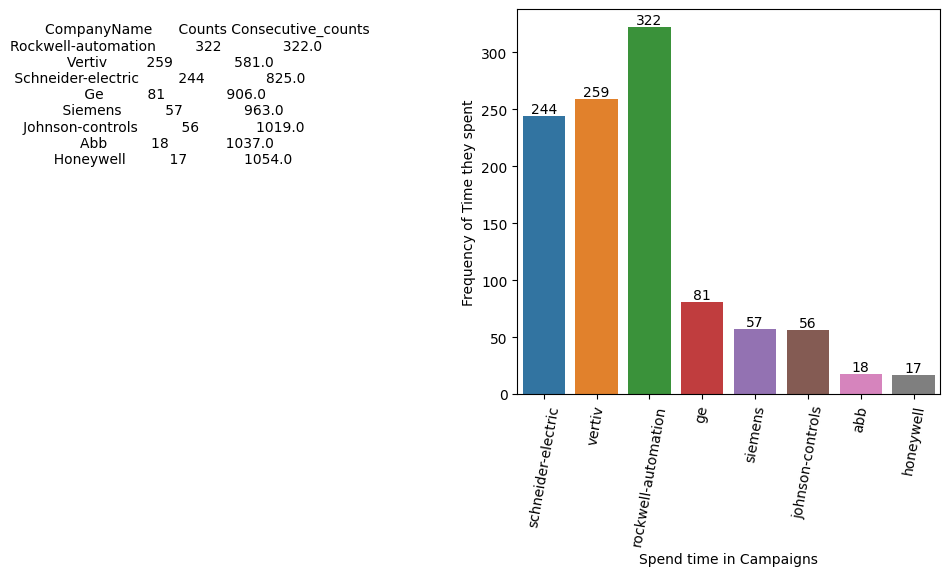

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))

text=df['company name'].str.capitalize().value_counts()\
              .sort_values(ascending=False)\
              .reset_index()\
              .rename(columns=({'index':'CompanyName','company name':'Counts'}))\
              .assign(Consecutive_counts=df['company name'].value_counts().reset_index().expanding().sum().round())

#text=text.set_index(drop=True)
#text = tabulate(text, headers='keys')
def format_value(num):
  global text
  if(len(text.CompanyName)>15):
    return 3*" "+ str(num)
  else :
    num=8*" "+ str(num)
    return num
text.Counts=text.Counts.apply(format_value)
text.Consecutive_counts=text.Consecutive_counts.apply(format_value)
ax[0].text(0.00005, 0.6,text.to_string(index=False))
ax[0].axis('off')
pl=sns.countplot(x=df['company name'],data=df)
for i in pl.containers:
  pl.bar_label(i)
ax[1].set_xlabel("Spend time in Campaigns")
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=80)
ax[1].set_ylabel("Frequency of Time they spent")
plt.show();

In [ ]:
topic_plot=df.groupby(['topic','company name'])['spend'].size().reset_index()


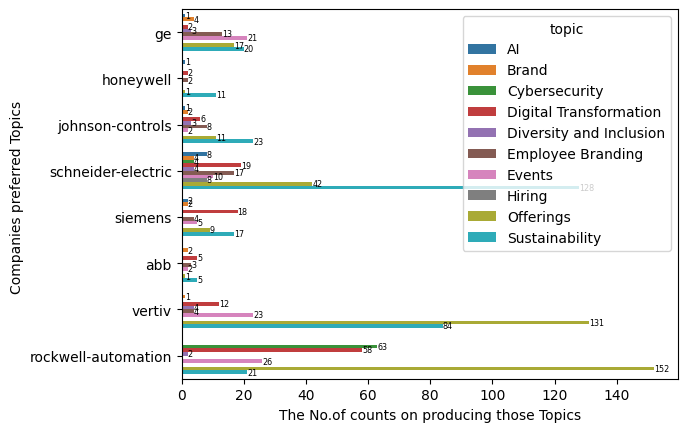

In [ ]:
# The Topics favoured by Companies and their Counts in producing those Contents of the topic
ax=sns.barplot(y=topic_plot['company name'],x=topic_plot['spend'],hue=topic_plot['topic'],data=topic_plot)
for label in ax.containers:
  ax.bar_label(label,fontsize='xx-small')
plt.xlabel("The No.of counts on producing those Topics")
plt.gca().yaxis.grid(False)
plt.ylabel("Companies preferred Topics ")
plt.show();

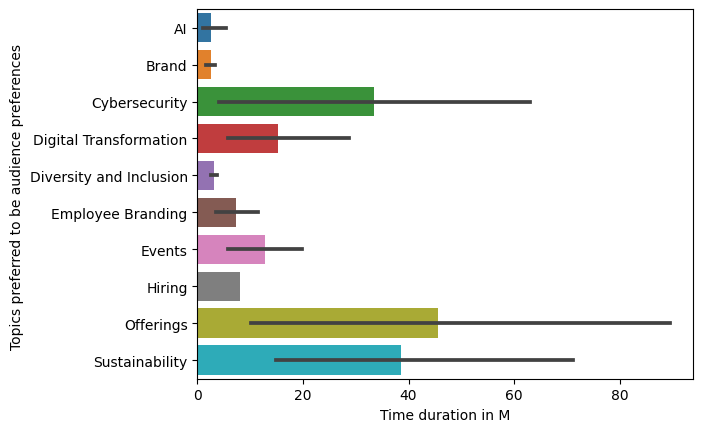

In [ ]:
sns.barplot(y=topic_plot['topic'],x=topic_plot['spend'],data=topic_plot)
plt.xlabel("Time duration in M")
plt.gca().yaxis.grid(False)
plt.ylabel("Topics preferred to be audience preferences ")
plt.show();

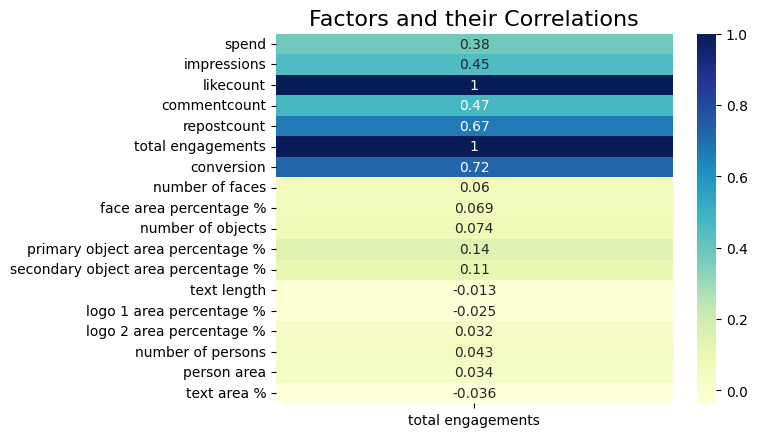

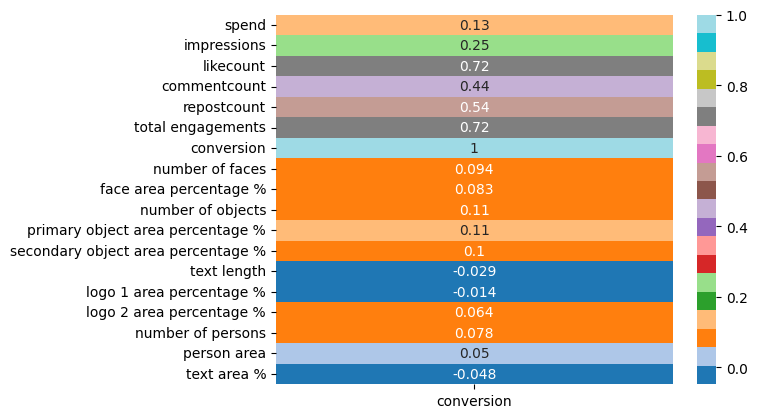

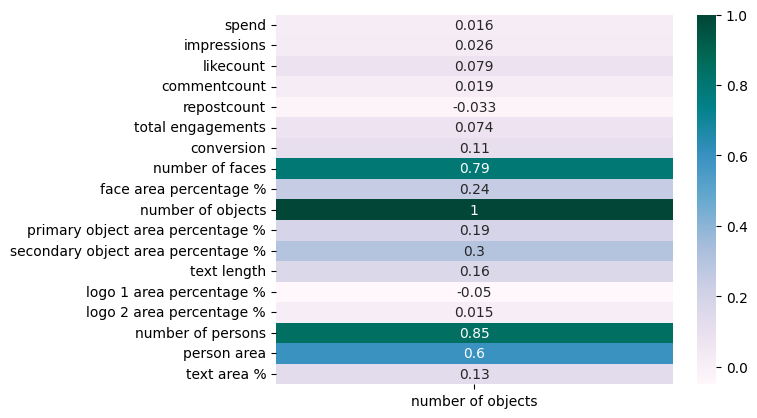

In [ ]:
#upon Researching through the datasets the High corelations exits for the following fields
plt.title("Factors and their Correlations",fontsize=16,fontstyle='normal')
sns.heatmap(df.corr()[['total engagements']],annot=True,cmap='YlGnBu')
plt.show();
sns.heatmap(df.corr()[['conversion']],annot=True,cmap='tab20')
plt.show();
sns.heatmap(df.corr()[['number of objects']],annot=True,cmap='PuBuGn')
plt.show();


*Outlier Treatment*

In [ ]:
#Top 2 records
top_2_records = df.nlargest(2, 'spend')
top=df[df['spend'].isin(top_2_records['spend'])]
top

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
53,01-09-2023,vertiv,23039.11,961453,129,0,10,139,6,Post,...,Friendly,Positive,8.70,> 40%,Sustainability,English,0,0,1,> 60
650,24-08-2023,ge,18819.88,929673,6130,30,131,6291,146,Post,...,NaN,NaN,1.70,> 40%,Events,English,0,0,1,< 20


In [ ]:
#Bottom 2 records

bottom_2_records = df.nsmallest(2, 'spend')
bottom=df[df['spend'].isin(bottom_2_records['spend'])]
bottom


,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
132,11-09-2023,rockwell-automation,0.00,0,0,0,0,0,0,Post,...,Friendly,Positive,8.40,> 40%,Offerings,English,0,0,1,> 60
844,21-08-2023,vertiv,0.03,21,1,0,0,1,0,Post,...,NaN,NaN,0.00,> 40%,Offerings,English,0,0,0,NaN


In [ ]:
#droping those rows
df.drop(index=top.index.tolist(), inplace=True, axis=0)
df.drop(index=bottom.index.tolist(), inplace=True, axis=0)

In [ ]:
df.isnull().sum()


date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               830
sharedposturl                          807
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           756
face position                          756
face area percentage %                   0
objects    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1053
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1050 non-null   object 
 1   company name                        1050 non-null   object 
 2   spend                               1050 non-null   float64
 3   impressions                         1050 non-null   int64  
 4   likecount                           1050 non-null   int64  
 5   commentcount                        1050 non-null   int64  
 6   repostcount                         1050 non-null   int64  
 7   total engagements                   1050 non-null   int64  
 8   conversion                          1050 non-null   int64  
 9   action                              1050 non-null   object 
 10  type                                1050 non-null   object 
 11  posturl                             1050 no



**Exploratory Data Analysis**



In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area percentage %', 'secondary object',
       'secondary object position', 'secondary object area percentage %',
       'text', 'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area percentage %', 'logo 2 name',
       'logo 2 position', 'logo 2 area percentage %', 'number of persons',
       'person area %', 'person area', 'style', 'tone', 'voice', 'sentiment',
       'text area %', 'empty space %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length'],

In [ ]:
df=df[['date','company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type','postcontent','created_at' , 'number of faces',
       'face emotion', 'face position', 'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object'
       , 'secondary object area percentage %',
       'text', 'text length', 'dominant colour','logos',
        'number of persons',
        'tone', 'voice', 'sentiment',
       'text area %', 'topic', 'language', '# faces',
       '# persons', '# objects', '# text length']]


In [ ]:
df=df.rename(columns={"company name":"CompanyName"})
df=df.drop('face emotion',axis=1)
df['face position']=df['face position'].fillna('No faces')


In [ ]:
df['face position'].value_counts()

No faces         756
top-right         60
center            58
center-right      55
center-left       46
top-center        34
top-left          26
bottom-center      8
bottom-left        5
bottom-right       2
Name: face position, dtype: int64

In [ ]:
#Since much significant values are unknown and couldn't have possible relationships we are droping the face position column
df=df.drop('face position',axis=1)

**Analogy : 1 \
number of objects**

*Selecting the unique words per row from post content column to fill in number of objects*

In [ ]:
df.objects.unique()

array([nan, 'Building', 'Glasses, Person, Person, Tie, Person, Glasses',
       'Person, Person, Ball', 'Home appliance',
       'Person, Person, Person, Person, Person, Person, Person, Person, Person, Person',
       'Light bulb',
       'Pants, Person, Pants, Person, Outerwear, Jeans, Top',
       'Person, Person, Person, Person, Suit', 'Person, Helmet',
       'Helmet, Computer keyboard, Person, Hat', 'Food, Food, Food, Food',
       'Packaged goods', 'Person, Person, Person, Person, Table',
       'Magazine, Book', 'Tie, Person', 'Person, Person, Person, Person',
       'Pants, Person, Top', 'Glasses, Person, Microphone, Suit',
       'Glasses, Person, Outerwear', 'Person, Coat',
       'Person, Person, Person, Person, Person, Person, Clothing, Top, Clothing, Clothing',
       'Packaged goods, Packaged goods, Packaged goods',
       'Table, Table, Table, Table',
       'Person, Person, Person, Person, Person, Person',
       'Clothing, Person, Person, Person',
       'Person, Perso

In [ ]:
unique_objects=list(df.objects.unique())
unique_object=[]
for object_list in unique_objects[1:]:
  for splitted_object in object_list.split(","):
    unique_object.append(splitted_object.lower())
distinct_words=set(unique_object)

In [ ]:
distinct_words

{' animal',
 ' backpack',
 ' bag',
 ' ball',
 ' belt',
 ' bicycle wheel',
 ' boat',
 ' book',
 ' bookcase',
 ' bowl',
 ' bracelet',
 ' building',
 ' cabinetry',
 ' candle',
 ' car',
 ' chair',
 ' clock',
 ' clothing',
 ' coat',
 ' coffee cup',
 ' computer keyboard',
 ' computer monitor',
 ' couch',
 ' dishwasher',
 ' door',
 ' dress',
 ' drink',
 ' egg',
 ' fireplace',
 ' flag',
 ' food',
 ' footwear',
 ' furniture',
 ' glasses',
 ' hat',
 ' helmet',
 ' home appliance',
 ' house',
 ' houseplant',
 ' jeans',
 ' lamp',
 ' laptop',
 ' light fixture',
 ' lighting',
 ' luggage & bags',
 ' microphone',
 ' mobile phone',
 ' musical instrument',
 ' necklace',
 ' outerwear',
 ' overall',
 ' packaged goods',
 ' pants',
 ' person',
 ' picture frame',
 ' pillow',
 ' plant',
 ' remote control',
 ' sculpture',
 ' ship',
 ' shirt',
 ' shoe',
 ' shorts',
 ' stethoscope',
 ' suit',
 ' sunglasses',
 ' table',
 ' table top',
 ' tablet computer',
 ' tableware',
 ' television',
 ' tie',
 ' tire',
 ' top',


In [ ]:
def format_way(row):
  global distinct_words
  objec=" "
  if isinstance(row.postcontent,str):
    value=set(word_tokenize(str(row.postcontent).capitalize()))
    for words in distinct_words:
      if words in value:
        objec+="".join(words.capitalize()+" ")
    objects=objec.strip()
    return objects
  elif not objec:
    objec='None'
    return objec

In [ ]:
df.objects[df.objects.isnull()]=df[df.objects.isnull()].apply(lambda row: format_way(row) ,axis=1)
df.objects=df.objects.apply(lambda x:x.replace('',"None") if  x.strip()==''else x)

**Analogy : 2 \
primary object and secondary object**

*Replacing if the corresponding row objects matches with null value of primary object ,the first occurence in the objects is set it as Value*

In [ ]:
primary_secondary=['primary object','secondary object']

In [ ]:
df['primary object']=df.apply(lambda row:row.objects.split(",")[0]
                              if pd.isnull(row['primary object']) else row['primary object'],axis=1)

In [ ]:
df['secondary object']=df.apply(lambda row:list(set(word.strip() for word in row.objects.split(",")))[-1]
                              if pd.isnull(row['secondary object']) else row['secondary object'],axis=1)

In [ ]:
df.isnull().sum()

date                                    0
CompanyName                             0
spend                                   0
impressions                             0
likecount                               0
commentcount                            0
repostcount                             0
total engagements                       0
conversion                              0
action                                  0
type                                    0
postcontent                             0
created_at                              0
number of faces                         0
face area percentage %                  0
objects                                 0
number of objects                       0
primary object                          0
primary object area percentage %        0
secondary object                        0
secondary object area percentage %      0
text                                  445
text length                             0
dominant colour                   

**Analogy : 3 \
text**

*Striping the contents of the text only as a columns having only alphanumeric string*

In [ ]:
df.text=df.text.fillna(" ")
df.text=df['text'].apply(lambda row : re.sub(r'[^\w\d]+'," ",row.lower()))
df.text=df.text.replace(" ","no text")

**Analogy : 4 \
dominant color**

*Finding at the dominant colour of null rows by Grouping of 'Company Name and type' that Matching with the most frequent colour*

In [ ]:
#Since in the dataset having [type] in [Video (External Source), Document, Poll, Text] are said to be empty values
#i.e does not contain the dominant color values for the above [type] \
#so we cannot groupby these class with mentioned condition and the solution is to be replace the Null values as no color
#Total null values in dominant colour
df['dominant colour'].isna().sum(axis=0)

356

In [ ]:
color_data=df.groupby(['CompanyName','type','dominant colour']).size().reset_index()
colour=pd.DataFrame(color_data)
colour = colour.rename(columns={0: 'Count'})
colour[:5]

,CompanyName,type,dominant colour,Count
0,abb,Article,black,1
1,abb,Article,darkslategray,2
2,abb,Article,gray,1
3,abb,Article,lightgray,1
4,abb,Article,lightslategray,1


In [ ]:
colour.shape

(215, 4)

In [ ]:
def colour_replace(row):
  global colour
  new_color=colour[(row['CompanyName']==colour['CompanyName']) & (row.type==colour.type)].nlargest(1,'Count').reset_index()
  return new_color['dominant colour']

In [ ]:
#Matching up the CompanyaName and type with relevent dominat colour having hig frequency
df['dominant colour']=df.apply(lambda row:colour_replace(row) if pd.isnull(row['dominant colour']) else row['dominant colour'] ,axis=1)

In [ ]:
df.type.value_counts()

Image                      557
Video (LinkedIn Source)    232
Article                    190
Video (External Source)     31
Document                    25
Poll                        12
Text                         3
Name: type, dtype: int64

In [ ]:
colour.type.value_counts()

Image                      84
Article                    70
Video (LinkedIn Source)    61
Name: type, dtype: int64

*The Above methods supports the Condition*

In [ ]:
#since for the condition we declared all the dominant color having
#type in [Video (External Source), Document, Poll, Text] as no color
df['dominant colour'] = df['dominant colour'].fillna('no colour')

In [ ]:
df['dominant colour'].value_counts()

darkslategray     321
black             229
no colour          71
firebrick          51
dimgray            46
silver             37
darkgray           34
lightgray          24
midnightblue       22
lightslategray     19
gray               17
darkslateblue      16
indianred          14
whitesmoke         12
darkolivegreen     11
peru               10
crimson            10
gainsboro          10
rosybrown           8
lightsteelblue      7
brown               7
linen               7
chocolate           4
wheat               4
darkkhaki           4
steelblue           4
tan                 4
lavender            3
slategray           3
lightseagreen       3
teal                3
skyblue             3
palevioletred       3
mediumseagreen      3
saddlebrown         2
royalblue           2
darkturquoise       2
darkblue            2
darkcyan            2
seagreen            1
greenyellow         1
honeydew            1
lightgreen          1
cadetblue           1
oldlace             1
lightblue 

In [ ]:
df['dominant colour'].isnull().sum()

0

**Analogy : 5 \
logos**

In [ ]:
df.logos.isnull().sum()

694

In [ ]:
logo=df.groupby(['CompanyName','logos']).size().reset_index() \
  .groupby('CompanyName').apply(lambda x:x.sort_values(0,ascending=False).iloc[:3]).reset_index(drop=True)
logo

,CompanyName,logos,0
0,abb,ABB Group,3
1,abb,"ABB Group, Jaguar Cars",1
2,ge,General Electric,16
3,ge,GE Transportation,3
4,ge,"General Electric, GE Appliances",2
5,honeywell,Honeywell,3
6,johnson-controls,Johnson Controls,7
7,johnson-controls,CNBC Arabiya,3
8,rockwell-automation,Rockwell Automation,114
9,rockwell-automation,PriceSmart,7


In [ ]:
def logo_set(x):
  global logo
  if(x.CompanyName=='honeywell'):
    return logo.at[5,'logos']
  elif(x.CompanyName=='abb'):
    ransome=np.random.randint(0,2)
    return logo.at[ransome,'logos']
  elif(x.CompanyName=='ge'):
    ransome=np.random.randint(2,5)
    return logo.xs(key=ransome).logos
  elif(x.CompanyName=='johnson-controls'):
    ransome=np.random.randint(6,8)
    return logo.at[ransome,'logos']
  elif(x.CompanyName=='rockwell-automation'):
    ransome=np.random.randint(8,11)
    return logo.at[ransome,'logos']
  elif(x.CompanyName=='schneider-electric'):
    ransome=np.random.randint(11,14)
    return logo.at[ransome,'logos']
  elif(x.CompanyName=='siemens'):
    ransome=np.random.randint(14,17)
    return logo.at[ransome,'logos']
  elif(x.CompanyName=='vertiv'):
    ransome=np.random.randint(17,20)
    return logo.at[ransome,'logos']

In [ ]:
df['logos']=df.apply(lambda x:logo_set(x) if pd.isnull(x.logos) else x.logos,axis=1)

In [ ]:
df.logos.isnull().sum()

0

In [ ]:
df.logos.value_counts()

Rockwell Automation                                               176
Vertiv Co                                                         136
Schneider Electric                                                111
PriceSmart                                                         75
Vertiv Co, Vertiv Co                                               71
Schneider Electric, Schneider Electric                             70
Gartner, Rockwell Automation                                       62
Schneider Electric, Schneider Electric, Schneider Electric         57
Amazon                                                             45
General Electric                                                   35
Johnson Controls                                                   31
CNBC Arabiya                                                       25
Siemens                                                            23
GE Transportation                                                  23
HuffPost            

**Analogy : 6\
tone , voice**

In [ ]:
df.isnull().sum()

date                                    0
CompanyName                             0
spend                                   0
impressions                             0
likecount                               0
commentcount                            0
repostcount                             0
total engagements                       0
conversion                              0
action                                  0
type                                    0
postcontent                             0
created_at                              0
number of faces                         0
face area percentage %                  0
objects                                 0
number of objects                       0
primary object                          0
primary object area percentage %        0
secondary object                        0
secondary object area percentage %      0
text                                    0
text length                             0
dominant colour                   

In [ ]:
df.tone.value_counts()

Informative      313
Inspirational     23
Name: tone, dtype: int64

In [ ]:
df.voice.value_counts()

Friendly        171
Professional    146
Name: voice, dtype: int64

In [ ]:
#since the voice and tone doesn't hold much significant information with relation to other fields droping on those columns
df.drop('tone',axis=1,inplace=True)
df.drop('voice',axis=1,inplace=True)

**Analogy : 7\
sentiment**

In [ ]:
df.sentiment.value_counts()

Positive    315
Neutral      23
Name: sentiment, dtype: int64

In [ ]:
df.sentiment.isnull().sum()

712

In [ ]:
def sentiment_analyze(row):
  sentiment=SentimentIntensityAnalyzer()
  sentiment_score=sentiment.polarity_scores(row.postcontent)
  if sentiment_score['compound']>0.05:
    return "Positive"
  elif sentiment_score['compound'] < -0.05:
    return "Negative"
  else:
    return "Neutral"

In [ ]:
#Analyse the sentiment scores by using SentimentIntensityAnalyzer module from nltk
df.sentiment=df.apply(lambda row:sentiment_analyze(row) if pd.isnull(row.sentiment) else row.sentiment,axis=1)

In [ ]:
df.sentiment.isnull().sum()

0

In [ ]:
df.sentiment.value_counts()

Positive    964
Neutral      61
Negative     25
Name: sentiment, dtype: int64

**Analogy : 8  \
 \# faces, # persons, # objects, # text length**

In [ ]:
object_list=['# faces','# persons','# objects']
for col in object_list:
  df[col]=df.apply(lambda x:(re.split(r'\bto\b|\bor\b',x[col])[1]).strip() if ((x[col]!='0') and (x[col]!='1')) else x[col],axis=1)
  df[col]=df[col].replace('more','6')
  df[col]=df[col].astype('int')

In [ ]:
#Taking the extreme value as the text length
df['# text length']=df['# text length'].apply(lambda row:(re.split(r'\bto\b|<|>',str(row))[1]).strip() if not pd.isnull(row) else '0')
df['# text length']=df['# text length'].astype('int')

In [ ]:
df.isnull().sum()

date                                  0
CompanyName                           0
spend                                 0
impressions                           0
likecount                             0
commentcount                          0
repostcount                           0
total engagements                     0
conversion                            0
action                                0
type                                  0
postcontent                           0
created_at                            0
number of faces                       0
face area percentage %                0
objects                               0
number of objects                     0
primary object                        0
primary object area percentage %      0
secondary object                      0
secondary object area percentage %    0
text                                  0
text length                           0
dominant colour                       0
logos                                 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1053
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1050 non-null   object 
 1   CompanyName                         1050 non-null   object 
 2   spend                               1050 non-null   float64
 3   impressions                         1050 non-null   int64  
 4   likecount                           1050 non-null   int64  
 5   commentcount                        1050 non-null   int64  
 6   repostcount                         1050 non-null   int64  
 7   total engagements                   1050 non-null   int64  
 8   conversion                          1050 non-null   int64  
 9   action                              1050 non-null   object 
 10  type                                1050 non-null   object 
 11  postcontent                         1050 no

In [ ]:
dg=df

In [ ]:
dg

,date,CompanyName,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,logos,number of persons,sentiment,text area %,topic,language,# faces,# persons,# objects,# text length
0,05-09-2023,schneider-electric,5.85,479,31,0,2,33,7,Post,...,"Schneider Electric, Schneider Electric, Schnei...",0,Positive,0.00,Offerings,English,0,0,0,0
1,01-09-2023,schneider-electric,1.80,3880,224,1,9,234,0,Post,...,Schneider Electric,0,Positive,1.85,Offerings,English,0,0,1,60
2,04-09-2023,schneider-electric,2.32,785,55,1,16,72,11,Post,...,"Schneider Electric, Schneider Electric, Schnei...",0,Positive,0.00,Sustainability,English,0,0,0,0
3,04-09-2023,schneider-electric,3.94,658,54,1,5,60,8,Post,...,Schneider Electric,0,Positive,0.00,Sustainability,English,0,0,0,0
4,04-09-2023,schneider-electric,3.89,2568,168,1,5,174,25,Post,...,"Schneider Electric, Schneider Electric",3,Positive,1.05,Sustainability,English,4,4,6,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,04-08-2023,rockwell-automation,0.89,536,34,1,1,36,1,Post,...,Rockwell Automation,0,Positive,0.00,Offerings,English,0,0,0,0
1050,08-08-2023,rockwell-automation,1.88,154,12,0,0,12,3,Post,...,PriceSmart,0,Neutral,1.15,Offerings,Korean,0,0,4,40
1051,04-08-2023,rockwell-automation,713.23,61614,622,2,80,704,105,Post,...,"Gartner, Rockwell Automation",0,Negative,0.00,Offerings,English,0,0,0,0
1052,08-08-2023,rockwell-automation,15.41,1000,32,0,1,33,2,Post,...,"Gartner, Rockwell Automation",4,Positive,0.00,Sustainability,English,4,4,6,0


**Feature Scaling**

In [ ]:
objects_columns=dg.select_dtypes(include='object').columns

In [ ]:
objects_columns

Index(['date', 'CompanyName', 'action', 'type', 'postcontent', 'created_at',
       'objects', 'primary object', 'secondary object', 'text',
       'dominant colour', 'logos', 'sentiment', 'topic', 'language'],
      dtype='object')

In [ ]:
for columns in objects_columns:
  LabelEncode=LabelEncoder()
  dg[columns]=LabelEncode.fit_transform(dg[columns])


In [ ]:
dg[:5]

,date,CompanyName,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,logos,number of persons,sentiment,text area %,topic,language,# faces,# persons,# objects,# text length
0,9,5,5.85,479,31,0,2,33,7,1,...,31,0,2,0.00,8,2,0,0,0,0
1,1,5,1.80,3880,224,1,9,234,0,1,...,26,0,2,1.85,8,2,0,0,1,60
2,7,5,2.32,785,55,1,16,72,11,1,...,31,0,2,0.00,9,2,0,0,0,0
3,7,5,3.94,658,54,1,5,60,8,1,...,26,0,2,0.00,9,2,0,0,0,0
4,7,5,3.89,2568,168,1,5,174,25,1,...,29,3,2,1.05,9,2,4,4,6,40


In [ ]:
df.corr()[['CompanyName']]

,CompanyName
date,-0.06
CompanyName,1.00
spend,-0.09
impressions,-0.13
likecount,-0.40
commentcount,-0.21
repostcount,-0.29
total engagements,-0.41
conversion,-0.36
action,0.14


In [ ]:
dg.columns

Index(['date', 'CompanyName', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'postcontent', 'created_at', 'number of faces',
       'face area percentage %', 'objects', 'number of objects',
       'primary object', 'primary object area percentage %',
       'secondary object', 'secondary object area percentage %', 'text',
       'text length', 'dominant colour', 'logos', 'number of persons',
       'sentiment', 'text area %', 'topic', 'language', '# faces', '# persons',
       '# objects', '# text length'],
      dtype='object')

*Evaluating the model performance for every Feature Scaling \
and model accuray on new data*

     likecount  commentcount  repostcount  total engagements  conversion
354         32             0            1                 33           1
692        393             2           27                422          40
487         35             0            1                 36           9
390        341             1           14                356         112
31          18             0            3                 21           1
..         ...           ...          ...                ...         ...
697        186             0           10                196          59
541         18             0            4                 22           7
451         43             1            1                 45           2
624        743             3            8                754         123
211        116             1           12                129          24

[210 rows x 5 columns]
[ 129.65  630.84   80.75  361.57   29.52  555.2   312.57    1.39  246.66
   55.07   62.31  227.58  1

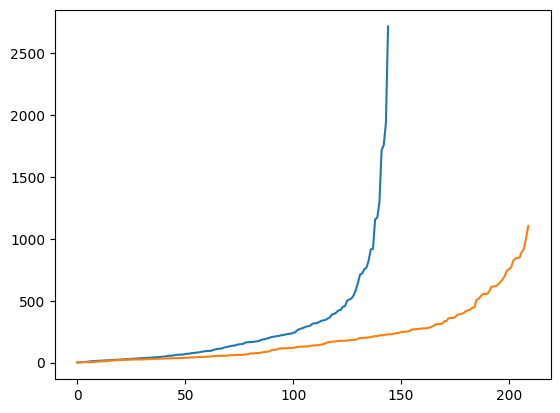

Scaler: StandardScaler, Accuracy: 149818.2845190476
     likecount  commentcount  repostcount  total engagements  conversion
354         32             0            1                 33           1
692        393             2           27                422          40
487         35             0            1                 36           9
390        341             1           14                356         112
31          18             0            3                 21           1
..         ...           ...          ...                ...         ...
697        186             0           10                196          59
541         18             0            4                 22           7
451         43             1            1                 45           2
624        743             3            8                754         123
211        116             1           12                129          24

[210 rows x 5 columns]
[5.41 5.46 5.46 5.47 5.46 5.53 5.47 5.47 5.46 5.

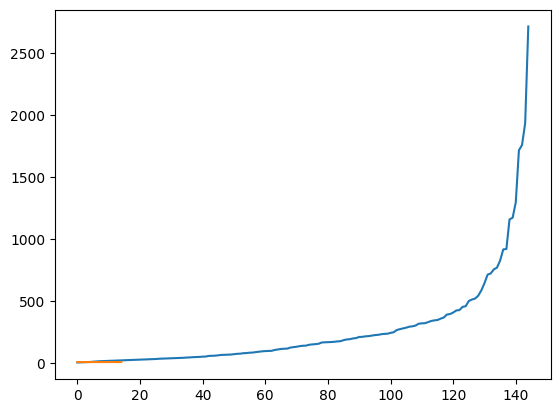

Scaler: MinMaxScaler, Accuracy: 149818.2845190476
     likecount  commentcount  repostcount  total engagements  conversion
354         32             0            1                 33           1
692        393             2           27                422          40
487         35             0            1                 36           9
390        341             1           14                356         112
31          18             0            3                 21           1
..         ...           ...          ...                ...         ...
697        186             0           10                196          59
541         18             0            4                 22           7
451         43             1            1                 45           2
624        743             3            8                754         123
211        116             1           12                129          24

[210 rows x 5 columns]
[5.46 5.46 5.46 5.46 5.46 5.46 5.46 5.46 5.46 5.46

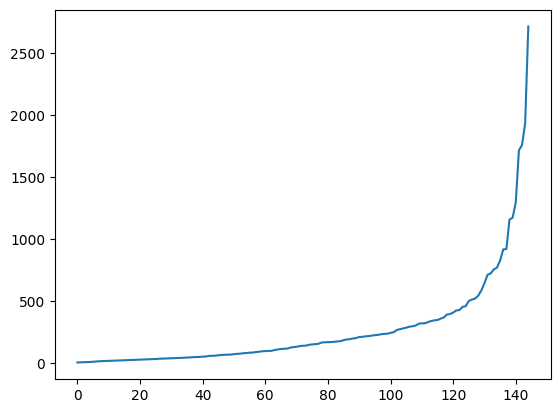

Scaler: RobustScaler, Accuracy: 149818.2845190476


In [ ]:


X=dg[[ 'CompanyName','spend', 'impressions',
        'type', 'postcontent','number of faces',
       'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'logos', 'number of persons', 'sentiment',
       'text area %', 'topic', '# faces', '# persons', '# objects',
       '# text length']]
y=dg[['likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion']]


# Assume X_train, X_test, y_train, y_test are your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create instances of different scalers
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for scaler in scalers:
    # Scale the training and testing data

    scale=scaler
    X_train_scale=scale.fit_transform(X_train)

    reg_model = RandomForestRegressor(n_estimators=100,random_state=42)
    reg_model.fit(X_train_scale,y_train)
    X_test=scale.transform(X_test)

    y_predicted = reg_model.predict(X_test)
    print(y_test)
    ypredicted=y_predicted[:,3]
    print(ypredicted)
    ypred=ypred.reshape(-1,1)
    unique_values, counts_actual = np.unique(y_test['total engagements'], return_counts=True)
    unique_values1, counts_actual = np.unique(ypredicted, return_counts=True)
    plt.plot(unique_values,label='test')
    plt.plot(unique_values1,label='predict')
    plt.show();

    accuracy = mean_squared_error(y_test['likecount'],y_pred[:,1])
    print(f"Scaler: {type(scaler).__name__}, Accuracy: {accuracy}")


*From above Analogy we conclude that Standard Scaler feature scale method holds mean variance for every individual features*

*Fine Tuning the hyperparameters and selecting best parameter\
from the model*

In [ ]:


X=dg[[ 'CompanyName','spend', 'impressions',
        'type', 'postcontent','number of faces',
       'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'logos', 'number of persons', 'sentiment',
       'text area %', 'topic', '# faces', '# persons', '# objects',
       '# text length']]
y=dg[['likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid ={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [80,100, 200, 300, 1000]
}
scale=StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test=scale.transform(X_test)
model = RandomForestRegressor()
Grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=4)
Grid_search.fit(X_train,y_train)
best=Grid_search.best_params_
print(best)


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}


[[338.21222003   5.53656308  14.74167331 358.49045642  63.98468751]
 [334.21190937   5.21469837  15.15199763 354.57860537  63.93757995]
 [331.42195126   5.0716009   15.64559537 352.13914753  63.58462299]
 ...
 [275.93815571   4.42953364  13.53733042 293.90501977  51.86105378]
 [322.19015415   4.92246747  13.49640953 340.60903115  62.56319982]
 [294.22163684   4.58350578  15.14530518 313.9504478   56.60784907]]
     likecount  commentcount  repostcount  total engagements  conversion
354         32             0            1                 33           1
692        393             2           27                422          40
487         35             0            1                 36           9
390        341             1           14                356         112
31          18             0            3                 21           1
..         ...           ...          ...                ...         ...
697        186             0           10                196          59
54

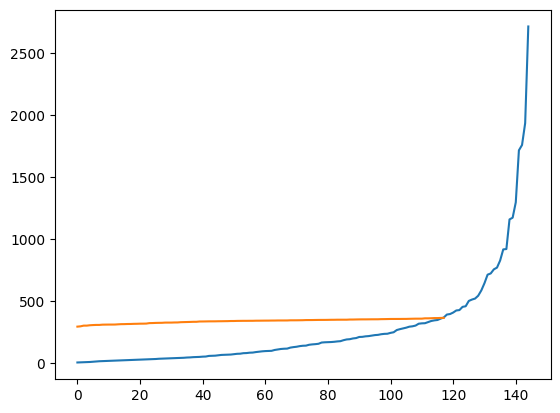

Scaler: RobustScaler, Accuracy: 147045.72444288674


In [ ]:
best={'bootstrap': [True],
      'max_depth': [80],
      'max_features': [3],
      'min_samples_leaf': [4],
      'min_samples_split': [8],
      'n_estimators': [100]}
grid_search=GridSearchCV(estimator=model,param_grid=best,cv=300)
grid_search.fit(X_train,y_train)
y_predicted=grid_search.predict(X_test)
# Make predictions
print(y_predicted)
print(y_test)
ypred=y_predicted[:,3]
print(ypred)
#shay=y_test.likecount.reshape(-1,1)
ypred=ypred.reshape(-1,1)
unique_values, counts_actual = np.unique(y_test['total engagements'], return_counts=True)
unique_values1, counts_actual = np.unique(y_predicted[:,3], return_counts=True)
plt.plot(unique_values,label='test')
plt.plot(unique_values1,label='predict')
plt.show();
#print(shax)
#model.score(shay,shax)
# Evaluate and print the accuracy
ypred= y_predicted[:,3]
accuracy = mean_squared_error(y_test['total engagements'],y_predicted[:,3])
print(f"Scaler: {type(scaler).__name__}, Accuracy: {accuracy}")


In [ ]:
dg.describe()

,date,CompanyName,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,logos,number of persons,sentiment,text area %,topic,language,# faces,# persons,# objects,# text length
count,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,...,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00,1050.00
mean,21.51,4.69,174.14,13332.22,192.27,2.89,11.62,206.78,34.90,1.00,...,23.04,0.86,1.89,7.21,6.75,2.02,0.83,0.92,1.88,29.64
std,12.38,1.80,865.28,54357.11,291.08,8.74,19.68,308.52,61.29,0.08,...,9.78,1.91,0.38,19.58,2.54,0.28,1.68,1.75,2.29,27.97
min,0.00,0.00,0.05,11.00,1.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11.00,4.00,6.63,812.50,33.00,0.00,1.00,35.00,5.00,1.00,...,18.25,0.00,2.00,0.00,5.00,2.00,0.00,0.00,0.00,0.00
50%,24.00,5.00,23.64,2577.00,98.50,0.00,5.00,110.00,14.00,1.00,...,24.00,0.00,2.00,0.45,8.00,2.00,0.00,0.00,1.00,20.00
75%,33.00,6.00,86.36,7573.00,220.00,2.00,14.00,241.00,39.75,1.00,...,31.00,1.00,2.00,9.28,9.00,2.00,1.00,1.00,4.00,60.00
max,41.00,7.00,15604.03,793976.00,2476.00,111.00,193.00,2715.00,589.00,2.00,...,39.00,10.00,2.00,366.90,9.00,5.00,6.00,6.00,6.00,60.00


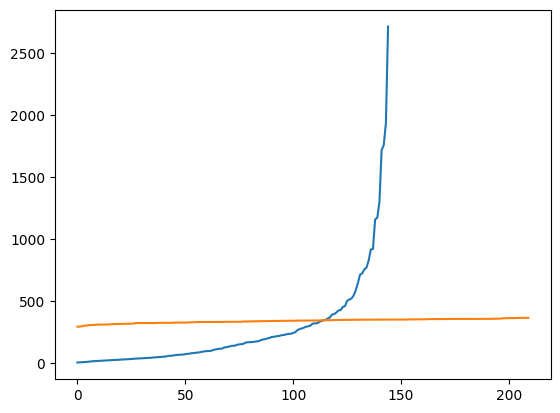

In [ ]:
#This states that the fine tuned model doesnt preform well with the new data
unique_values, counts_actual = np.unique(y_test['total engagements'], return_counts=True)
plt.plot(unique_values,label='actual')
plt.plot(np.sort(ypred),label='unknown')
plt.show()

In [ ]:
data=pd.read_csv('/content/Rocketium AI_ML Internship Assignment - 2 - Dataset for final evaluation.csv')
data.columns

Index(['date', 'company name', 'spend', 'impressions', 'likecount',
       'commentcount', 'repostcount', 'total engagements', 'conversion',
       'action', 'type', 'posturl', 'postcontent', 'profileurl', 'videourl',
       'sharedposturl', 'created_at', 'size', 'url', 'number of faces',
       'face emotion', 'face position', 'face area %', 'objects',
       'number of objects', 'primary object', 'primary object position',
       'primary object area %', 'secondary object',
       'secondary object position', 'secondary object area %', 'text',
       'text length', 'dominant colour', 'cta', 'logos', 'logo 1 name',
       'logo 1 position', 'logo 1 area %', 'logo 2 name', 'logo 2 position',
       'logo 2 area %', 'number of persons', 'person area %', 'person area',
       'style', 'tone', 'voice', 'sentiment', 'text area %', 'empty space %',
       'topic', 'language', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')

In [ ]:
#columns based on training dataset
alt_data=data[['company name', 'spend', 'impressions',
        'type', 'postcontent', 'number of faces',
       'face area %', 'objects',
       'number of objects', 'primary object',
       'primary object area %', 'secondary object',
        'secondary object area %', 'text',
       'text length', 'dominant colour', 'logos',
       'number of persons','sentiment',
        'text area %',
       'topic', '# faces', '# persons', '# objects',
       '# text length']]


In [ ]:
alt_data=alt_data.rename(columns={'company name':'CompanyName','face area %':'face area percentage %',
                   'primary object area %':'primary object area percentage %',
                   'secondary object area %' :'secondary object area percentage %'
                   })

In [ ]:
alt_data.columns

Index(['CompanyName', 'spend', 'impressions', 'type', 'postcontent',
       'number of faces', 'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'logos', 'number of persons', 'sentiment',
       'text area %', 'topic', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')

In [ ]:
data.shape

(122, 57)

In [ ]:
alt_data.shape

(122, 25)

In [ ]:
alt_data[:5]

,CompanyName,spend,impressions,type,postcontent,number of faces,face area percentage %,objects,number of objects,primary object,...,dominant colour,logos,number of persons,sentiment,text area %,topic,# faces,# persons,# objects,# text length
0,rockwell-automation,4.03,520,Image,Heading to Automation Fair? Talk to the truste...,2.00,0.20,"Jeans, Jeans, Person, Person, Outerwear, Top",6.00,Person,...,gainsboro,NaN,2.00,Positive,8.81,Offerings,2 to 4,2 to 4,5 or more,> 60
1,rockwell-automation,0.52,74,Image,Accelerate your data journey and get more valu...,1.00,5.31,"Hat, Laptop, Person, Glasses, Person, Person, Top",7.00,Person,...,gainsboro,NaN,3.00,NaN,NaN,Offerings,1,2 to 4,5 or more,NaN
2,rockwell-automation,1.10,256,Video (LinkedIn Source),What do industry visionaries and inspirational...,NaN,NaN,NaN,NaN,NaN,...,crimson,Rockwell Automation,NaN,Positive,8.06,Digital Transformation,NaN,NaN,NaN,> 60
3,siemens,3.07,600,Image,Tune into Spotify and listen to our first podc...,2.00,1.96,"Person, Person, Suit, Suit, Clothing",5.00,Person,...,darkslateblue,NaN,2.00,NaN,9.37,Digital Transformation,2 to 4,2 to 4,5 or more,> 60
4,johnson-controls,25.60,1267,Article,"The blueprint for smart, healthy, #sustainable...",3.00,0.44,"Person, Jeans, Jeans, Person, Jeans, Coat, Per...",10.00,Person,...,darkslategray,NaN,3.00,Positive,5.30,Sustainability,2 to 4,2 to 4,5 or more,> 60


In [ ]:
obj_column=alt_data.select_dtypes(include='object').columns

In [ ]:
for co in obj_column:
  alt_data[co]=LabelEncode.fit_transform(alt_data[co])

In [ ]:

# Assuming new dataset may have some missing values
imputer = SimpleImputer(strategy='mean')
new_imputed_data = imputer.fit_transform(alt_data)

In [ ]:
alt_data=pd.DataFrame(data=new_imputed_data,columns=alt_data.columns)

In [ ]:
alt_data[:5]

,CompanyName,spend,impressions,type,postcontent,number of faces,face area percentage %,objects,number of objects,primary object,...,dominant colour,logos,number of persons,sentiment,text area %,topic,# faces,# persons,# objects,# text length
0,4.00,4.03,520.00,2.00,36.00,2.00,0.20,21.00,6.00,11.00,...,10.00,18.00,2.00,1.00,8.81,7.00,1.00,2.00,2.00,3.00
1,4.00,0.52,74.00,2.00,4.00,1.00,5.31,16.00,7.00,11.00,...,10.00,18.00,3.00,2.00,7.03,7.00,0.00,2.00,2.00,4.00
2,4.00,1.10,256.00,3.00,106.00,2.22,3.55,75.00,3.76,19.00,...,3.00,8.00,1.62,1.00,8.06,3.00,3.00,4.00,3.00,3.00
3,6.00,3.07,600.00,2.00,92.00,2.00,1.96,58.00,5.00,11.00,...,6.00,18.00,2.00,2.00,9.37,3.00,1.00,2.00,2.00,3.00
4,3.00,25.60,1267.00,0.00,85.00,3.00,0.44,40.00,10.00,11.00,...,7.00,18.00,3.00,1.00,5.30,8.00,1.00,2.00,2.00,3.00


In [ ]:
# Check for feature names in  training
print("Feature names of x_Y_training:", Grid_search.feature_names_in_)
# Check for feature names of the test data
print("Feature names in x_y_test data:",alt_data.columns)

Feature names of x_Y_training: ['CompanyName' 'spend' 'impressions' 'type' 'postcontent'
 'number of faces' 'face area percentage %' 'objects' 'number of objects'
 'primary object' 'primary object area percentage %' 'secondary object'
 'secondary object area percentage %' 'text' 'text length'
 'dominant colour' 'logos' 'number of persons' 'sentiment' 'text area %'
 'topic' '# faces' '# persons' '# objects' '# text length']
Feature names in x_y_test data: Index(['CompanyName', 'spend', 'impressions', 'type', 'postcontent',
       'number of faces', 'face area percentage %', 'objects',
       'number of objects', 'primary object',
       'primary object area percentage %', 'secondary object',
       'secondary object area percentage %', 'text', 'text length',
       'dominant colour', 'logos', 'number of persons', 'sentiment',
       'text area %', 'topic', '# faces', '# persons', '# objects',
       '# text length'],
      dtype='object')


In [ ]:
to_predict_columns=['likecount', 'commentcount', 'repostcount', 'total engagements','conversion']

In [ ]:
Predicted=reg_model.predict(alt_data)

In [ ]:
Resulting *.xlsx file is attached to the workbook and can be found in the
“Tools -> File Uploader” dialog from the workbook header or through “Attach Data” option from the File System view.

In [ ]:
for index,col in enumerate(to_predict_columns):
  data[col]=(Predicted[:,index])

In [ ]:
data[:5]

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,17-10-2023,rockwell-automation,4.03,520,730.85,12.69,38.74,782.28,169.89,Post,...,Friendly,Positive,8.81,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,> 60
1,17-10-2023,rockwell-automation,0.52,74,776.45,15.70,37.20,829.35,188.74,Post,...,NaN,NaN,NaN,10% to 20%,Offerings,English,1,2 to 4,5 or more,NaN
2,17-10-2023,rockwell-automation,1.10,256,804.80,15.50,39.05,859.35,195.31,Post,...,Friendly,Positive,8.06,> 40%,Digital Transformation,English,NaN,NaN,NaN,> 60
3,17-10-2023,siemens,3.07,600,738.81,13.12,39.21,791.14,174.30,Post,...,NaN,NaN,9.37,> 40%,Digital Transformation,English,2 to 4,2 to 4,5 or more,> 60
4,17-10-2023,johnson-controls,25.60,1267,996.87,19.76,37.27,1053.90,204.62,Post,...,Friendly,Positive,5.30,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,> 60


In [ ]:
data

,date,company name,spend,impressions,likecount,commentcount,repostcount,total engagements,conversion,action,...,voice,sentiment,text area %,empty space %,topic,language,# faces,# persons,# objects,# text length
0,17-10-2023,rockwell-automation,4.03,520,730.85,12.69,38.74,782.28,169.89,Post,...,Friendly,Positive,8.81,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,> 60
1,17-10-2023,rockwell-automation,0.52,74,776.45,15.70,37.20,829.35,188.74,Post,...,NaN,NaN,NaN,10% to 20%,Offerings,English,1,2 to 4,5 or more,NaN
2,17-10-2023,rockwell-automation,1.10,256,804.80,15.50,39.05,859.35,195.31,Post,...,Friendly,Positive,8.06,> 40%,Digital Transformation,English,NaN,NaN,NaN,> 60
3,17-10-2023,siemens,3.07,600,738.81,13.12,39.21,791.14,174.30,Post,...,NaN,NaN,9.37,> 40%,Digital Transformation,English,2 to 4,2 to 4,5 or more,> 60
4,17-10-2023,johnson-controls,25.60,1267,996.87,19.76,37.27,1053.90,204.62,Post,...,Friendly,Positive,5.30,> 40%,Sustainability,English,2 to 4,2 to 4,5 or more,> 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,13-10-2023,rockwell-automation,1.20,180,755.22,13.65,39.12,807.99,180.56,Post,...,NaN,NaN,NaN,> 40%,Offerings,English,2 to 4,2 to 4,5 or more,NaN
118,13-10-2023,ge,2.68,1162,791.74,14.87,38.07,844.68,191.64,Post,...,NaN,NaN,NaN,> 40%,Events,English,NaN,NaN,NaN,NaN
119,13-10-2023,rockwell-automation,2.15,113,719.11,12.76,40.59,772.46,166.10,Post,...,NaN,NaN,2.51,> 40%,Offerings,English,1,1,2 to 4,40 to 60
120,14-10-2023,siemens,0.79,2195,746.44,13.22,42.34,802.00,179.18,Post,...,NaN,NaN,2.58,> 40%,Digital Transformation,English,2 to 4,2 to 4,5 or more,< 20


In [ ]:
from google.colab import drive,files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.to_excel('/content/drive/My Drive/Rocketium AI_ML Internship Assignment - 2 - Dataset for final evaluation.xlsx', index=False)